#  2019 Ford GoBike System Dataset Exploration and Visualization
###### by (Bukola Ajayi)

## Investigation Overview 
In this investigation, I wanted to highlight the importance and value of data visualization techniques in the data analysis process. This involves the comparison of one, two or more variables and also predicting their insight and impact on each other.

## Dataset Overview
This dataset includes information about individual rides made on a bike-sharing system covering the greater San Francisco Bay area in the year 2019.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
#reading the csv file
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


In [24]:
#making a copy of the dataset
df_bike = df.copy()

In [25]:
#after exporting the cleaned data, then we read the csv file 
df_bikes = pd.read_csv('fordgobike-tripdata_clean.csv')
df_bikes.sample()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_week,duration_mins
151699,398,2019-02-06,2019-02-06,49,S Park St at 3rd St,37.78076,-122.394989,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4965,Subscriber,1984,Female,No,Wednesday,6


## 1. The Users' Distribution

In [26]:
#title and labels function
def plot_lables(plt, ax, title, x_title, y_title,fontsize_title, fontsize_xlabel, fontsize_ylabel ):
    ax.grid(False)
    ax.set_title(title, fontsize = fontsize_title)
    ax.set_xlabel(x_title, fontsize = fontsize_xlabel)
    ax.set_ylabel(y_title, fontsize = fontsize_ylabel)
    plt.show()

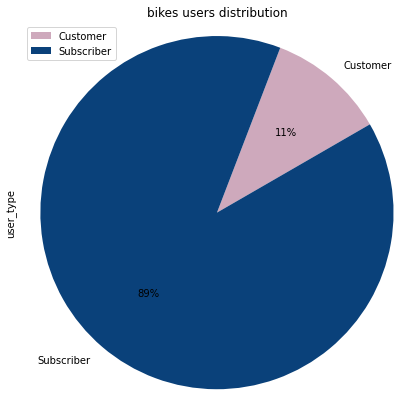

In [27]:
#plotting the results
fig = plt.gcf()
fig.set_size_inches(7,7) 
explode = [0, 0]
df_bikes['user_type'].groupby( df_bike['user_type']).count().plot(kind='pie', autopct='%1.0f%%', startangle=30,
        colors = ['#cea9bc', '#0a417a'], title = 'bikes users distribution', explode = explode)

#setting the properties for the chart
plt.axis('equal')
plt.legend(loc = 'upper left')
plt.show()

> There are more of subscribers than customers, this shows a lot of people actually subcribed to the bikes sharing plan.

## 2. Most Popular Stations

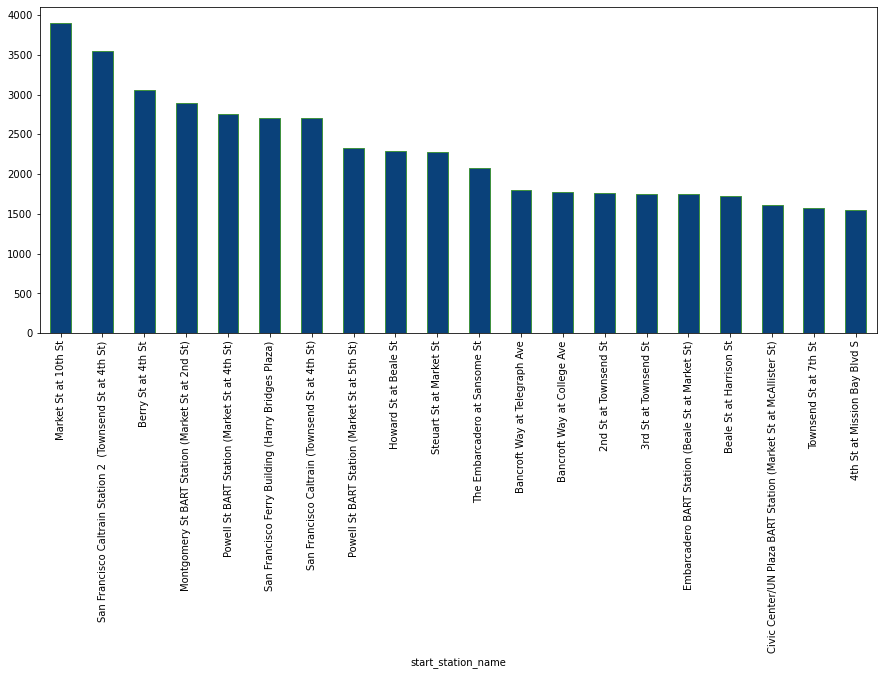

In [28]:
#ordering the start stations in descending order
df_bike_s = df_bikes.groupby('start_station_name')['start_station_name'].count()
df_bike_ss= df_bike_s.sort_values(ascending=False)
df_start_station= df_bike_ss.head(20)


#plotting the chart
fig = plt.figure(figsize=(15,6))
df_start_station_plot= df_start_station.plot(kind = 'bar', color="#0a417a", edgecolor="#409240", linewidth=1)
plot_lables(plt, ax, 'distribution of bikes across the top 20 stations', 'top 20 start stations', 'rides count', 15, 10, 10)

#### The top twenty most popular start station includes:
- Market St at 10th St                                               
- San Francisco Caltrain Station 2  (Townsend St at 4th St)         
- Berry St at 4th St                                               
- Montgomery St BART Station (Market St at 2nd St)                   
- Powell St BART Station (Market St at 4th St)                       
- San Francisco Ferry Building (Harry Bridges Plaza)               
- San Francisco Caltrain (Townsend St at 4th St)                     
- Powell St BART Station (Market St at 5th St)                       
- Howard St at Beale St                                             
- Steuart St at Market St                                           
- The Embarcadero at Sansome St                                     
- Bancroft Way at Telegraph Ave                                      
- Bancroft Way at College Ave                                       
- 2nd St at Townsend St                                            
- 3rd St at Townsend St                                             
- Embarcadero BART Station (Beale St at Market St)                   
- Beale St at Harrison St                                            
- Civic Center/UN Plaza BART Station (Market St at McAllister St)    
- Townsend St at 7th St                                             
- 4th St at Mission Bay Blvd S                                   

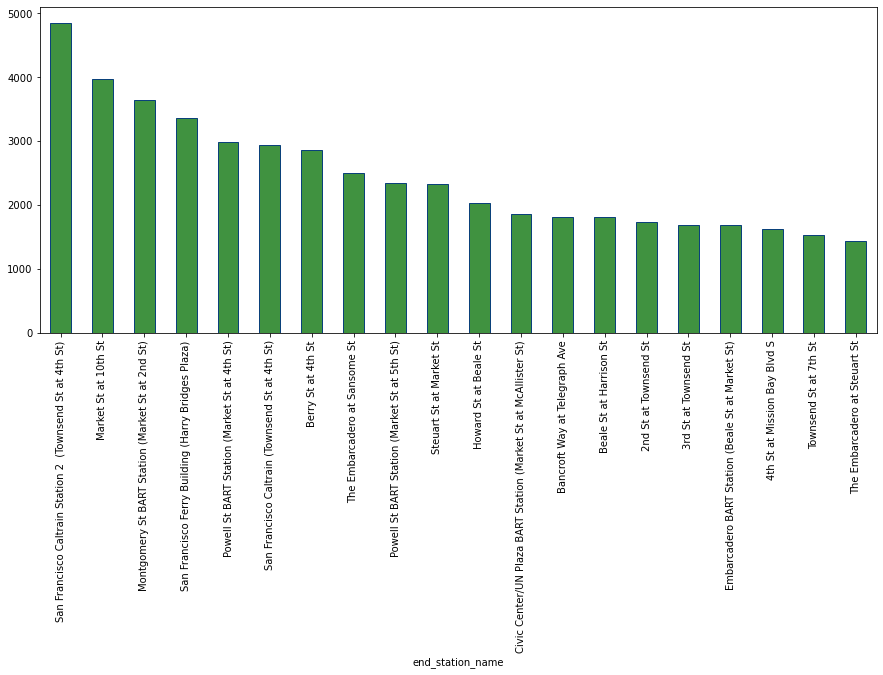

In [29]:
#ordering the end stations in descending order
df_bike_e = df_bikes.groupby('end_station_name')['end_station_name'].count()
df_bike_es= df_bike_e.sort_values(ascending=False)
df_end_station= df_bike_es.head(20)

#plotting the chart
fig = plt.figure(figsize=(15,6))
df_end_station_plot= df_end_station.plot(kind = 'bar',color='#409240', edgecolor='#0a417a', linewidth=1)
plot_lables(plt, ax, 'distribution of bikes across the end 20 stations', 'top 20 end stations', 'rides count', 15, 10, 10)

#### The top twenty most popular end station includes:
- San Francisco Caltrain Station 2  (Townsend St at 4th St)        
- Market St at 10th St                                              
- Montgomery St BART Station (Market St at 2nd St)                  
- San Francisco Ferry Building (Harry Bridges Plaza)                
- Powell St BART Station (Market St at 4th St)                      
- San Francisco Caltrain (Townsend St at 4th St)                    
- Berry St at 4th St                                                 
- The Embarcadero at Sansome St                                    
- Powell St BART Station (Market St at 5th St)                     
- Steuart St at Market St                                           
- Howard St at Beale St                                              
- Civic Center/UN Plaza BART Station (Market St at McAllister St)
- Bancroft Way at Telegraph Ave                                      
- Beale St at Harrison St                                            
- 2nd St at Townsend St                                           
- 3rd St at Townsend St                                         
- Embarcadero BART Station (Beale St at Market St)               
- 4th St at Mission Bay Blvd S                                  
- Townsend St at 7th St                                            
- The Embarcadero at Steuart St                                 

## 3. Trip Duration based on Gender

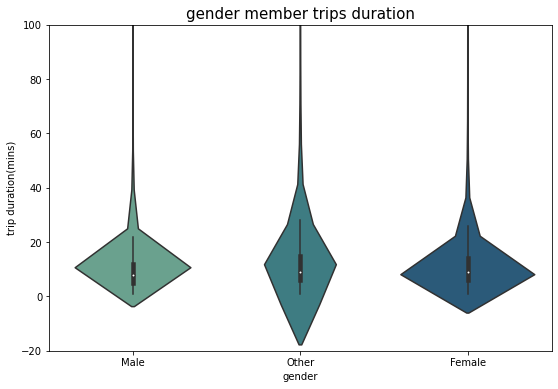

In [30]:
#plotting the chart
fig = plt.figure(figsize=(9,6))
ax = sns.violinplot(y='duration_mins', x='member_gender', data=df_bikes, palette='crest')
ax.grid(False)
plt.ylim(-20,100)
plot_lables(plt, ax, 'gender member trips duration', 'gender', 'trip duration(mins)', 15, 10, 10)

It can be seen that the females and other genders have a higher average trip duration when compared to the males.

## 4. Trip Distribution Based on Gender

In [31]:
# Creating a weekly index 
weekly_index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#ordering the index 
df_bikes['start_time_week'] = pd.Categorical(df_bikes['start_time_week'], categories = weekly_index ,ordered=True)

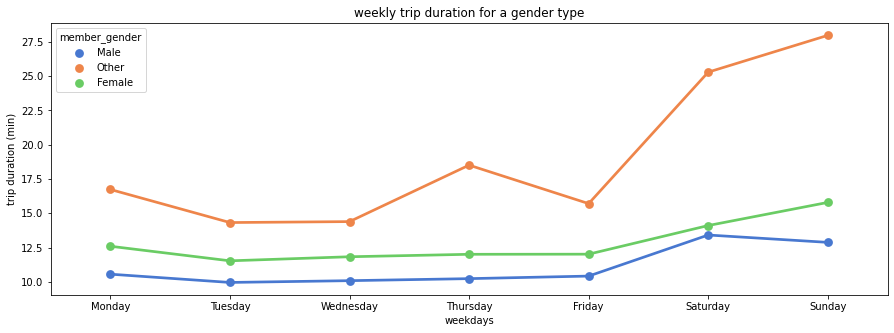

In [32]:
#Plotting the chart
fig = plt.figure(figsize=(15,5))
sns.pointplot(data = df_bikes, x = 'start_time_week', y = 'duration_mins', hue = 'member_gender', palette='muted',  ci=None)
plt.title('weekly trip duration for a gender type')
plt.ylabel('trip duration (min)')
plt.xlabel('weekdays')
plt.show()

All genders spend the highest amount of time on trips, mostly on Saturdays. However, other genders appear to spend more trip duration time while the male and female gender follow quite the same pattern.

## 5. Users' Distribution on Trips 

In [33]:
#categorising birth year to different year ranges
bins = [-1, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, np.inf]
names = ['<1900','1990-1910', '1910-1920','1920-1930', '1930-1940', '1940-1950',
         '1950-1960','1960-1970','1970-1980', '1980-1990', '1990-2000', '2000+']
        
#grouping year into different year groups 
df_bikes['birth_year_ranges'] = pd.cut(df_bikes['member_birth_year'], bins, labels=names)

#Creating an index for year groups to enable in an ascending order
birth_year_index = ['<1900','1990-1910', '1910-1920','1920-1930', '1930-1940', '1940-1950', 
                    '1950-1960','1960-1970','1970-1980', '1980-1990', '1990-2000', '2000+']
# Ordering the index
df_bikes['birth_year_ranges'] = pd.Categorical(df_bikes['birth_year_ranges'], 
                                categories=birth_year_index, ordered=True)

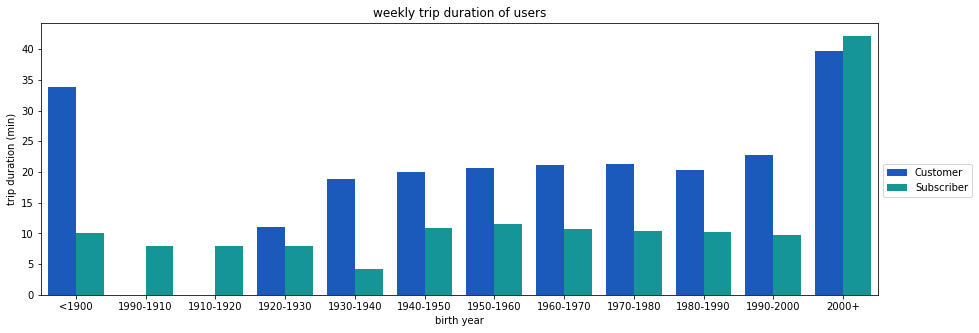

In [34]:
#grouping the members based on their stages
df_year_members = df_bikes.groupby(['birth_year_ranges'])['birth_year_ranges'].count().reset_index(
            name='count').sort_values(['count'], 
            ascending=False)

fig = plt.figure(figsize=(15,5))
sns.barplot(data =df_bikes, x='birth_year_ranges', y='duration_mins',
            ci=None, hue='user_type', palette='winter')
plt.title('weekly trip duration of users')
plt.ylabel('trip duration (min)')
plt.xlabel('birth year')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()


- Here I observed that both customers and subscribers show almost similar trends for age and trip duration. But there is a slight tilt toward a higher age for customers. Also, I observed that subscribers and customers in the birth year group 2000(less than 40 years old) were the main bike renters.

- Subscribers in the age group of less than 20 years (2000+) surpassed customers within the same age bracket, while customers in the age group of 20–30 years (1990–2000)surpassed subscribers within the same age bracket. Bike rentals with riders in other age groups fluctuate with the seasons with or without subscription.